# Cross-Selling Assicurativo

AssurePredict è una compagnia di assicurazioni leader nel settore, specializzata nell'offrire soluzioni innovative per la gestione del rischio. Questo progetto mira a creare un modello predittivo in grado di individuare potenziali opportunità di cross-selling per clienti esistenti, identificando quelli che potrebbero essere interessati ad acquistare una polizza aggiuntiva per il loro veicolo.

**OBIETTIVO DEL PROGETTO**

L'obiettivo è sviluppare un modello di machine learning che preveda se i clienti, che attualmente hanno un'assicurazione sanitaria, potrebbero essere interessati a sottoscrivere una polizza assicurativa per il loro veicolo. Il modello aiuterà AssurePredict a migliorare l'efficacia delle proprie strategie di cross-selling e ad aumentare la penetrazione nel mercato

**VALORE AGGIUNTO PER AssurePredict**
- Aumento del tasso di conversione nelle vendite di polizze auto.
- Ottimizzazione delle campagne di marketing, indirizzando le offerte a clienti più propensi ad acquistare.
- Riduzione dei costi legati a campagne di marketing inefficaci, grazie alla targettizzazione precisa.

**DATASET**
Il dataset contiene informazioni dettagliate sui clienti e sul loro comportamento assicurativo. Le caratteristiche principali del dataset sono:

- **id**: id univoco dell'acquirente.
- **Gender**: sesso dell'acquirente.
- **Age**: età dell'acquirente.
- **Driving_License**: 1 se l'utente ha la patente di guida, 0 altrimenti.
- **Region_Code**: codice univoco della regione dell'acquirente.
- **Previously_Insured**: 1 se l'utente ha già un veicolo assicurato, 0 altrimenti.
- **Vehicle_Age**: età del veicolo
- **Vehicle_Damage**: 1 se l'utente ha danneggiato il veicolo in passato, 0 altrimenti.
- **Annual_Premium**: la cifra che l'utente deve pagare come premio durante l'anno.
- **Policy_Sales_Channel**: codice anonimizzato del canale utilizzato per la proposta (es. per email, per telefono, di persona, ecc...)
- **Vintage**: giorni da cui il cliente è assicurato con AssurePredict.
- **Response**: 1 se l'acquirente ha risposto positivametne alla proposta di cross-selling, 0 altrimenti.

L'obiettivo del modello è prevedere il valore di **Response**.

**ATTIVITA' RICHIESTE**
1. **ESPLORAZIONE DEL DATASET**:
L'esplorazione preliminare del dataset permetterà di comprendere meglio la distribuzione delle caratteristiche e delle variabili target. In particolare, si analizzeranno:

    - La distribuzione della variabile "Response", per identificare eventuali sbilanciamenti tra clienti che accettano o rifiutano l'offerta di cross-sell.
    - Le relazioni tra variabili chiave come Annual Premium, Vehicle Age, Previously Insured, e la risposta del cliente.

Valore aggiunto: Un'accurata esplorazione dei dati permette di identificare pattern nascosti e punti critici che influenzeranno il successo del modello predittivo.

2. **GESTIONE DELLO SBILANCIAMENTO DELLE CLASSI**:
La variabile target "Response" potrebbe essere sbilanciata, con molti più clienti che rifiutano l'offerta rispetto a quelli che la accettano. Per affrontare questo problema, verranno utilizzate tecniche di:

    - Class Weights: penalizzazione della classe più frequente nel modello.
    - Oversampling o Undersampling: creazione di un dataset più bilanciato per migliorare la capacità del modello di generalizzare.

Valore aggiunto: Gestire correttamente lo sbilanciamento delle classi è cruciale per evitare modelli che abbiano un alto tasso di falsi negativi, migliorando così la precisione del cross-sell.

3. **COSTRUZIONE DEL MODELLO PREDITTIVO**:
Utilizzando algoritmi di machine learning, verrà costruito un modello che predice la probabilità che un cliente risponda positivamente all'offerta di cross-sell.

Valore aggiunto: Il modello predittivo permetterà a AssurePredict di identificare con precisione i clienti più propensi a sottoscrivere una polizza aggiuntiva, migliorando così il ritorno sull'investimento delle campagne di marketing.

**CONCLUSIONI**
Questo progetto permetterà a AssurePredict di sfruttare le potenzialità del machine learning per identificare opportunità di cross-selling in modo efficace e mirato. L'adozione di un approccio data-driven per la predizione delle risposte dei clienti garantirà non solo un aumento delle vendite, ma anche una maggiore soddisfazione del cliente grazie a offerte più pertinenti e personalizzate.


### 1. ESPLORAZIONE DEL DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
URL = "insurance_cross_sell.csv"
df = pd.read_csv(URL)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Dimensione

In [ ]:
df.shape

(381109, 12)

Check duplicati

In [ ]:
duplicates = df.duplicated()
print(duplicates.unique())

[False]


Trasformazione dei dati qualitativi in dati quantitativi

In [ ]:
vehicle_age_values = df["Vehicle_Age"].values
np.unique(vehicle_age_values)

array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)

In [ ]:
df_proc = df.copy()
df_proc = df_proc.drop("id", axis=1)

years_mapping = {"1-2 Year":1, "< 1 Year":2, "> 2 Years":3}
gender_mapping = {"Male":1, "Female":0}
damage_mapping = {"Yes":1, "No":0}

df_proc["Vehicle_Age"] = df_proc["Vehicle_Age"].map(years_mapping) #per sostituire le stringhe con il valore num
df_proc["Gender"] = df_proc["Gender"].map(gender_mapping)
df_proc["Vehicle_Damage"] = df_proc["Vehicle_Damage"].map(damage_mapping)
df_proc.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,2,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,2,0,27496.0,152.0,39,0


Statistiche generali

In [ ]:
df_proc.count()

Gender                  381109
Age                     381109
Driving_License         381109
Region_Code             381109
Previously_Insured      381109
Vehicle_Age             381109
Vehicle_Damage          381109
Annual_Premium          381109
Policy_Sales_Channel    381109
Vintage                 381109
Response                381109
dtype: int64

In [ ]:
df_proc.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [ ]:
df_proc.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,0.540761,38.822584,0.997869,26.388807,0.458210,1.516388,0.504877,30564.389581,112.034295,154.347397,0.122563
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.577698,0.499977,17213.155057,54.203995,83.671304,0.327936
min,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,1.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,2.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,3.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Focus su "Response", la classe sbilanciata

In [ ]:
responses_ones = np.count_nonzero(df_proc["Response"])
responses_zeros = df_proc.shape[0] - responses_ones
mean = (responses_ones/df_proc.shape[0])*100

print(f"Response ha {responses_zeros} valori pari a 0")
print(f"Response ha {responses_ones} valori pari a 1")
print(f"La % di utenti che accetta il cross-selling è {mean:.2f} %")

Response ha 334399 valori pari a 0
Response ha 46710 valori pari a 1
La % di utenti che accetta il cross-selling è 12.26 %


Tale classe risulta essere effetivamente sbilanciata e richiede gli interventi richiesti dalla specifica.

Check sulle correlazioni

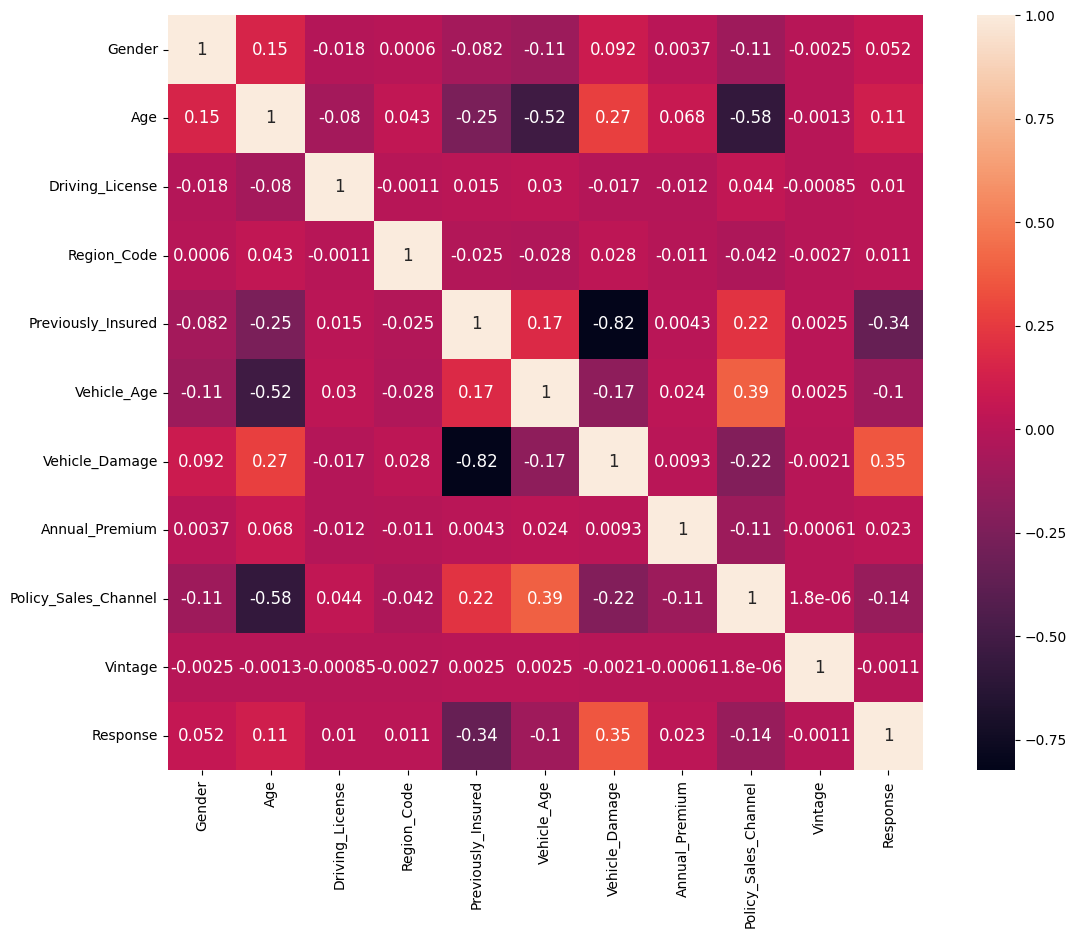

In [ ]:
plt.figure(figsize=(14, 10), dpi=100)

hm = sns.heatmap(df_proc.corr(),
                 cbar=True,
                 square=True,
                 yticklabels=df_proc.columns,
                 xticklabels=df_proc.columns,
                 annot=True,                  #Questo ci mostra i valori degli indici
                 annot_kws={'size':12})       #Impostiamo la dimensione dell'annotazione a 12 per farla entrare dentro il quadrato

plt.show()

In [ ]:
corr_matrix = df_proc.corr()
correlation = np.array(corr_matrix)
corr_array = correlation.reshape((corr_matrix.shape[0]*corr_matrix.shape[1],1))
corr_array_sorted = np.sort(corr_array,axis=0)
corr_array_sorted = np.unique(corr_array,axis=0)
# corr_array_sorted[-17,0]
corr_array_sorted[:5]

array([[-0.82414266],
       [-0.57782553],
       [-0.52229971],
       [-0.34117046],
       [-0.25468239]])

In [ ]:
response_corr = correlation[10,:]
response_corr_sorted = np.sort(response_corr,axis = 0)
response_corr_sorted

array([-0.34117046, -0.1390415 , -0.10407847, -0.00105037,  0.01015517,
        0.01056986,  0.0225747 ,  0.05243991,  0.11114689,  0.35439954,
        1.        ])

Quelli a più alta correlazione sono:
- vehicle_damage e previously_insured
- policy_sale_channel e Age
- vehicle_age e Age

Per Response:
- previously_insured
- vehicle_damage
- policy_sale_channel
- vehicle_age
- Age


Visualizzazione delle distribuzioni delle variabili

(-0.5, 1.5)

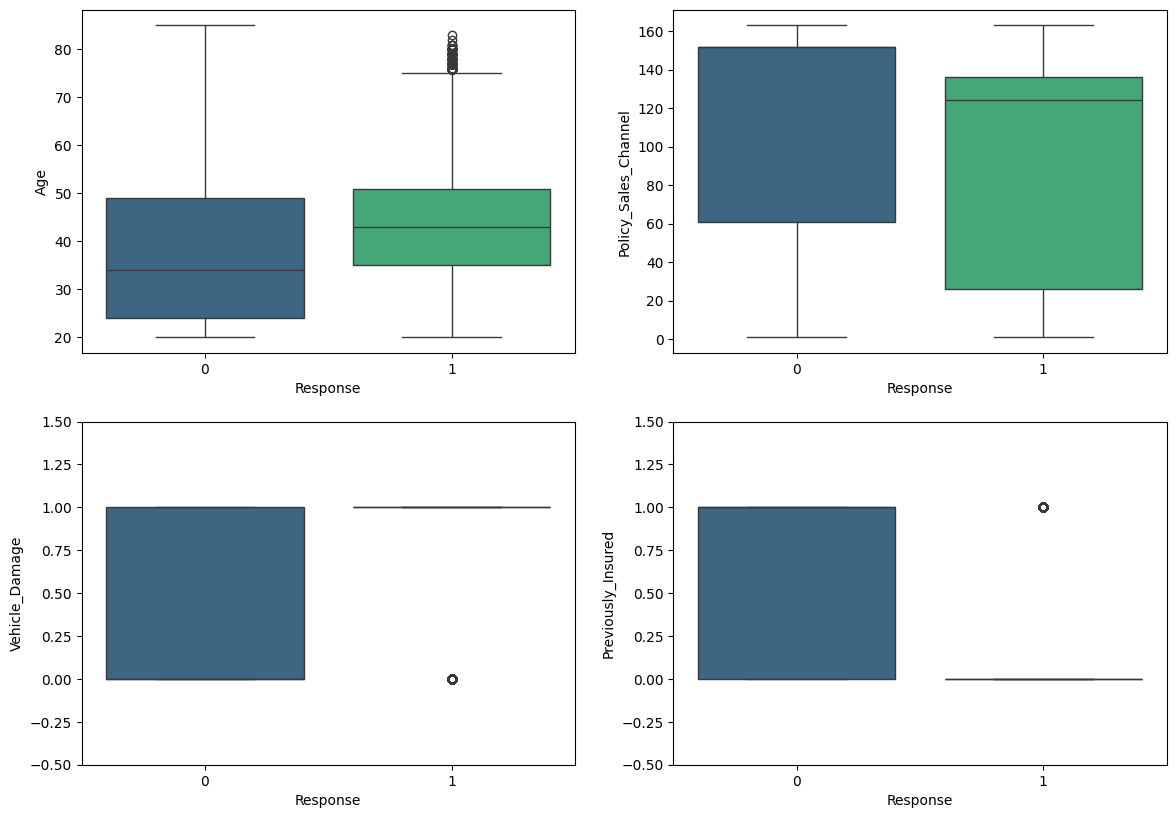

In [ ]:
plt.figure(figsize=(14, 10), dpi=100)

plt.subplot(2, 2, 1)
sns.boxplot(x="Response", y="Age", data=df_proc, palette="viridis", hue="Response", legend=False)
plt.subplot(2, 2, 2)
sns.boxplot(x="Response", y="Policy_Sales_Channel", data=df_proc, palette="viridis", hue="Response", legend=False)
plt.subplot(2, 2, 3)
sns.boxplot(x="Response", y="Vehicle_Damage", data=df_proc, palette="viridis", hue="Response", legend=False)
plt.ylim(-0.5, 1.5)
plt.subplot(2, 2, 4)
sns.boxplot(x="Response", y="Previously_Insured", data=df_proc, palette="viridis", hue="Response", legend=False)
plt.ylim(-0.5, 1.5)

Gli ultimi due grafici non rappresentano bene l'informazione dietro alla relazione Vehicle_Damage-Response e Previously_Insured-Response. Si vedono in ogni caso dei possibili outliers quando response è 1. Proviamo a visualizzare il tutto tramite istogrammi

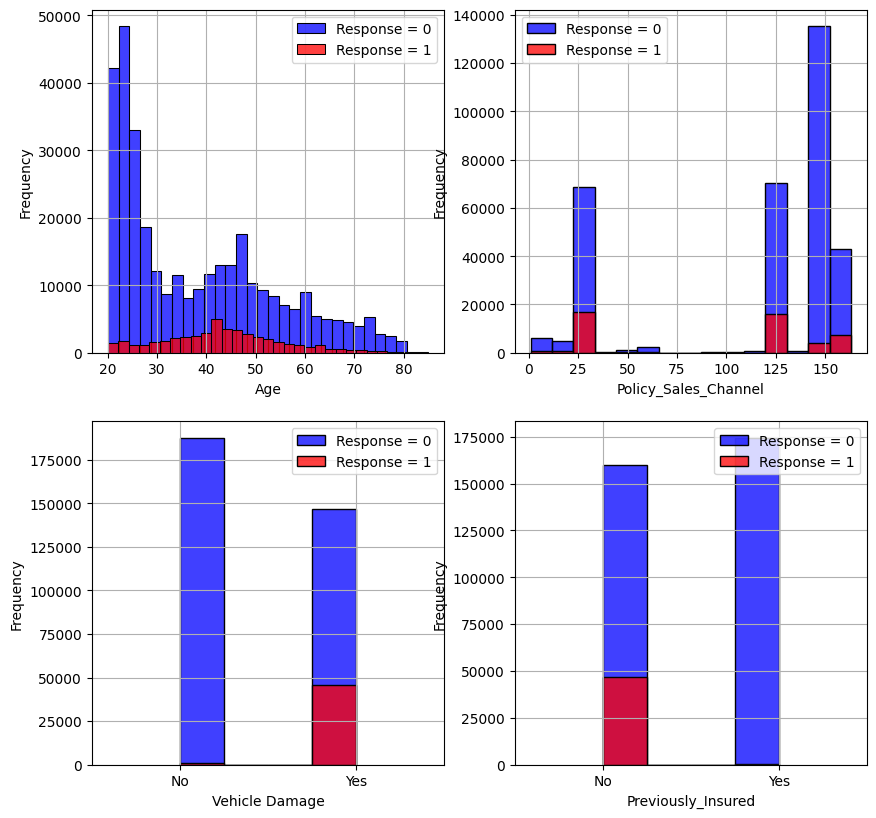

In [ ]:
plt.figure(figsize=(10, 10), dpi=100)

plt.subplot(2, 2, 1)
sns.histplot(df_proc[df_proc['Response'] == 0]['Age'], color='blue', label='Response = 0', kde=False, bins=30)
sns.histplot(df_proc[df_proc['Response'] == 1]['Age'], color='red', label='Response = 1', kde=False, bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 2)
sns.histplot(df_proc[df_proc['Response'] == 0]['Policy_Sales_Channel'], color='blue', label='Response = 0', kde=False, bins=15)
sns.histplot(df_proc[df_proc['Response'] == 1]['Policy_Sales_Channel'], color='red', label='Response = 1', kde=False, bins=15)
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 3)
sns.histplot(df_proc[df_proc['Response'] == 0]['Vehicle_Damage'], color='blue', label='Response = 0', kde=False, bins=4)
sns.histplot(df_proc[df_proc['Response'] == 1]['Vehicle_Damage'], color='red', label='Response = 1', kde=False, bins=4)
plt.xlabel('Vehicle Damage')
plt.ylabel('Frequency')
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 4)
sns.histplot(df_proc[df_proc['Response'] == 0]['Previously_Insured'], color='blue', label='Response = 0', kde=False, bins=4)
sns.histplot(df_proc[df_proc['Response'] == 1]['Previously_Insured'], color='red', label='Response = 1', kde=False, bins=4)
plt.xlabel('Previously_Insured')
plt.ylabel('Frequency')
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
df_proc[df_proc['Response'] == 1]['Previously_Insured'].value_counts()

0    46552
1      158
Name: Previously_Insured, dtype: int64

In [ ]:
df_proc[df_proc['Response'] == 1]['Vehicle_Damage'].value_counts()

1    45728
0      982
Name: Vehicle_Damage, dtype: int64

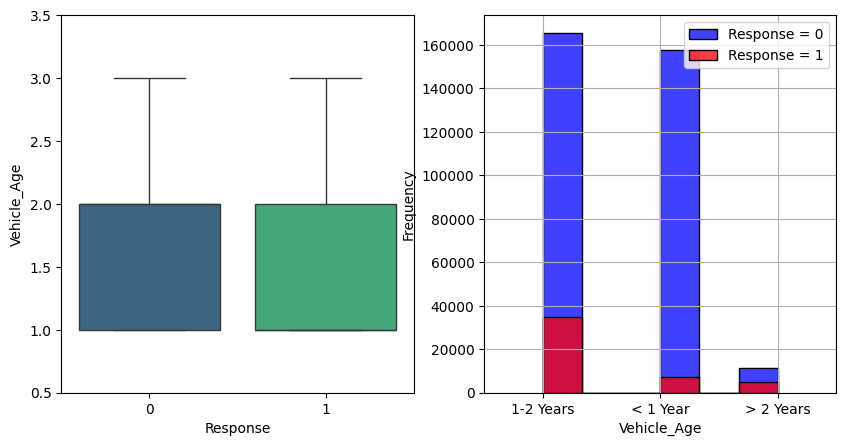

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)

plt.subplot(1, 2, 1)
sns.boxplot(x="Response", y="Vehicle_Age", data=df_proc, palette="viridis", hue="Response", legend=False)
plt.ylim(0.5, 3.5)
plt.subplot(1, 2, 2)
sns.histplot(df_proc[df_proc['Response'] == 0]['Vehicle_Age'], color='blue', label='Response = 0', kde=False, bins=6)
sns.histplot(df_proc[df_proc['Response'] == 1]['Vehicle_Age'], color='red', label='Response = 1', kde=False, bins=6)
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.xlim(0.5, 3.5)
plt.xticks([1, 2, 3], ['1-2 Years', '< 1 Year', '> 2 Years'])
plt.legend()
plt.grid(True)

La variabile "Vehicle_Age" per ora la escludiamo dal set di variabili con cui costruiremo il set ridotto. Includerla nei test successivi

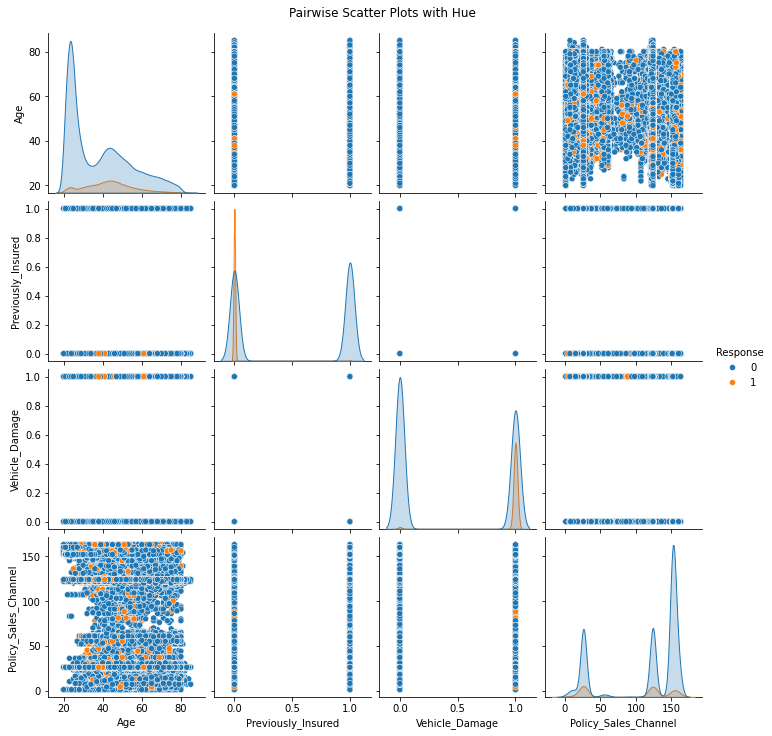

In [ ]:
def plot_pairwise_scatter_with_hue(df, vars_to_plot=None, hue='Response'):

    if vars_to_plot is not None:
        df = df[vars_to_plot + [hue]]

    sns.pairplot(df, hue=hue)
    plt.suptitle('Pairwise Scatter Plots with Hue', y=1.02)
    plt.show()


plot_pairwise_scatter_with_hue(df_proc, vars_to_plot=['Age', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel'])

##### DEFINIZIONE DATI DI INPUT AL CLASSIFICATORE

In [ ]:
# define dataset
X = df_proc.drop("Response", axis=1).values
y = df_proc["Response"].values

#Prendo le tre variabili maggiormente correlate
X_short = df_proc[["Previously_Insured", "Vehicle_Damage", "Policy_Sales_Channel", "Age"]].values

print("X min e max:", X.min(), X.max())
print("X_short min e max:", X_short.min(), X_short.max())
print("y min e max:", y.min(), y.max())

X min e max: 0.0 540165.0
X_short min e max: 0.0 163.0
y min e max: 0 1


TRAIN-TEST SPLITTING

A questo punto splittiamo i due set e su di essi faremo standardizzazione e gestione dello sbilanciamento delle classi

In [ ]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 0

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, random_state=RANDOM_SEED, test_size= 0.3, stratify=y)
print("full dataset train: ", X_train_full.shape, y_train_full.shape)
print("full dataset test: ", X_test_full.shape, y_test_full.shape)
print("-----------")

X_train_short, X_test_short, y_train_short, y_test_short = train_test_split(X_short, y, random_state=RANDOM_SEED, test_size= 0.3, stratify=y)
print("short dataset train: ", X_train_short.shape, y_train_short.shape)
print("short dataset test: ", X_test_short.shape, y_test_short.shape)
print("-----------")


full dataset train:  (266776, 10) (266776,)
full dataset test:  (114333, 10) (114333,)
-----------
short dataset train:  (266776, 4) (266776,)
short dataset test:  (114333, 4) (114333,)
-----------


NORMALIZZAZIONE E STANDARDIZZAZIONE

Ricorda che la standardizzazione (come le altre trasformazioni) andrebbe applicata sul training e poi sul test usando gli stessi parametri del training

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# #Normalizzazione
# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)
# print(X_norm.min(), X_norm.max())

#Standardizzazione
ss = StandardScaler()

X_train_full_std = ss.fit_transform(X_train_full)
X_test_full_std = ss.transform(X_test_full)
print("Full dataset", X_train_full_std.mean(), X_train_full_std.std())
print("-----------")

X_train_short_std = ss.fit_transform(X_train_short)
X_test_short_std = ss.transform(X_test_short)
print("Short dataset", X_train_short_std.mean(), X_train_short_std.std())
print("-----------")

Full dataset -5.816960052253797e-17 1.0000000000003104
-----------
Short dataset 5.441081623968853e-17 0.9999999999999328
-----------


### 2. SBILANCIAMENTO DELLE CLASSI


Dai suggerimenti/approfondimenti emerge che:
- utilizzo di modelli che penalizzano (class_weight..)
    - Often the handling of class penalties or weights are specialized to the learning algorithm. There are penalized versions of algorithms such as penalized-SVM and penalized-LDA.
- Generare dataset sintetici
    - There are systematic algorithms that you can use to generate synthetic samples. The most popular of such algorithms is called SMOTE or the Synthetic Minority Over-sampling Technique.
    - imbalanced-learn on python (https://github.com/scikit-learn-contrib/imbalanced-learn) che è collegato a [l'oversampling o l'undersampling](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/).

    

In [ ]:
import imblearn

L’oversampling invece (come undersampling o simili), andrebbe applicato esclusivamente al training siccome ha poco senso valutare il modello in fase di test con osservazioni fittizie.

In [ ]:
# example of random oversampling to balance the class distribution
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# summarize class distribution
print("Original:  ", Counter(y))

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority') #RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train_full_std, y_train_full)
# summarize class distribution
print("Oversampling:  ", Counter(y_over))

#Faccio oversampling sul dataset completo
oversampled_dataset = (X_over, y_over)


Original:   Counter({0: 334399, 1: 46710})
Oversampling:   Counter({0: 234079, 1: 234079})


In [ ]:
# summarize class distribution
print("Original:  ", Counter(y))

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority') #RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over_short, y_over_short = oversample.fit_resample(X_train_short_std, y_train_short)
# summarize class distribution
print("Oversampling:  ", Counter(y_over_short))

#Faccio oversampling sul dataset completo
oversampled_dataset_short = (X_over_short, y_over_short)

Original:   Counter({0: 334399, 1: 46710})
Oversampling:   Counter({0: 234079, 1: 234079})


In [ ]:
# summarize class distribution
print("Original:  ", Counter(y))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority') #RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train_full_std, y_train_full)
# summarize class distribution
print("Undersampling:  ", Counter(y_under))

#Faccio undersampling sul dataset completo
undersampled_dataset_short = (X_under, y_under)

Original:   Counter({0: 334399, 1: 46710})
Undersampling:   Counter({0: 32697, 1: 32697})


In [ ]:
# summarize class distribution
print("Original:  ", Counter(y))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority') #RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under_short, y_under_short = undersample.fit_resample(X_train_short_std, y_train_short)
# summarize class distribution
print("Undersampling:  ", Counter(y_under_short))

#Faccio undersampling sul dataset completo
undersampled_dataset_short = (X_under_short, y_under_short)

Original:   Counter({0: 334399, 1: 46710})
Undersampling:   Counter({0: 32697, 1: 32697})


### 3. COSTRUZIONE DEL MODELLO

Per ora abbiamo:
- X_std, y -> full_dataset standardizzato
- X_std_short, y -> short_dataset standardizzato

da cui i dataset con l'oversampling
- X_over, y_over -> oversampled_dataset standardizzato
- X_over_short, y_over_short -> oversampled_dataset_short standardizzato

e i dataset con l'undersampling
- X_under, y_under -> undersampled_dataset standardizzato
- X_under_short, y_under_short -> undersampled_dataset_short standardizzato

NB. La standardizzazione viene effettuata su tutti i modelli + il train-test-split è stato già implementato

In [ ]:
full_dataset_train = (X_train_full_std, y_train_full)
full_dataset_test = (X_test_full_std, y_test_full)
print("full dataset train: ", full_dataset_train[0].shape, full_dataset_train[1].shape)
print("full dataset test: ", full_dataset_test[0].shape, full_dataset_test[1].shape)
print("-----------")

short_dataset_train = (X_train_short_std, y_train_short)
short_dataset_test = (X_test_short_std, y_test_short)
print("short dataset train: ", short_dataset_train[0].shape, short_dataset_train[1].shape)
print("short dataset test: ", short_dataset_test[0].shape, short_dataset_test[0].shape)
print("-----------")

oversampled_dataset_train = (X_over, y_over)
oversampled_dataset_test = (X_test_full_std, y_test_full)
print("oversampled dataset train: ", oversampled_dataset_train[0].shape, oversampled_dataset_train[1].shape)
print("oversampled dataset test: ", oversampled_dataset_test[0].shape, oversampled_dataset_test[1].shape)
print("-----------")

oversampled_dataset_short_train = (X_over_short, y_over_short)
oversampled_dataset_short_test = (X_test_short_std, y_test_short)
print("oversampled dataset short train: ", oversampled_dataset_short_train[0].shape, oversampled_dataset_short_train[1].shape)
print("oversampled dataset short test: ", oversampled_dataset_short_test[0].shape, oversampled_dataset_short_test[1].shape)
print("-----------")

undersampled_dataset_train= (X_under, y_under)
undersampled_dataset_test = (X_test_full_std, y_test_full)
print("undersampled dataset short train: ", undersampled_dataset_train[0].shape, undersampled_dataset_train[1].shape)
print("undersampled dataset short test: ", undersampled_dataset_test[0].shape, undersampled_dataset_test[1].shape)
print("-----------")

undersampled_dataset_short_train = (X_under_short, y_under_short)
undersampled_dataset_short_test = (X_test_short_std, y_test_short)
print("undersampled dataset short train: ", undersampled_dataset_short_train[0].shape, undersampled_dataset_short_train[1].shape)
print("undersampled dataset short test: ", undersampled_dataset_short_test[0].shape, undersampled_dataset_short_test[1].shape)
print("-----------")

full dataset train:  (266776, 10) (266776,)
full dataset test:  (114333, 10) (114333,)
-----------
short dataset train:  (266776, 4) (266776,)
short dataset test:  (114333, 4) (114333, 4)
-----------
oversampled dataset train:  (468158, 10) (468158,)
oversampled dataset test:  (114333, 10) (114333,)
-----------
oversampled dataset short train:  (468158, 4) (468158,)
oversampled dataset short test:  (114333, 4) (114333,)
-----------
undersampled dataset short train:  (65394, 10) (65394,)
undersampled dataset short test:  (114333, 10) (114333,)
-----------
undersampled dataset short train:  (65394, 4) (65394,)
undersampled dataset short test:  (114333, 4) (114333,)
-----------


VALUTAZIONE MODELLO

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

def evaluate(model,data):
    x, y = data
    y_pred = model.predict(x)
    y_proba = model.predict_proba(x)
    auc_value = roc_auc_score(y, y_proba[:,1])

    print(classification_report(y, y_pred))
    print("AUC = ", auc_value)


##### A) LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight="balanced")

In [ ]:
#Full dataset
print("full dataset training")
lr.fit(full_dataset_train[0], full_dataset_train[1])
evaluate(lr, (full_dataset_train[0], full_dataset_train[1]))
print("full dataset test")
evaluate(lr, (full_dataset_test[0], full_dataset_test[1]))


full dataset training
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    234079
           1       0.25      0.98      0.40     32697

    accuracy                           0.64    266776
   macro avg       0.62      0.78      0.57    266776
weighted avg       0.90      0.64      0.70    266776

AUC =  0.8202883169969895
full dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8192313235340483


In [ ]:
#Short dataset
print("short dataset training")
lr.fit(short_dataset_train[0], short_dataset_train[1])
evaluate(lr, (short_dataset_train[0], short_dataset_train[1]))
print("short dataset test")
evaluate(lr, (short_dataset_test[0], short_dataset_test[1]))


short dataset training
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    234079
           1       0.25      0.98      0.40     32697

    accuracy                           0.64    266776
   macro avg       0.62      0.78      0.57    266776
weighted avg       0.90      0.64      0.70    266776

AUC =  0.8176750296996272
short dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8169219476765196


In [ ]:
#Oversampled dataset
print("oversampled dataset training")
lr.fit(oversampled_dataset_train[0], oversampled_dataset_train[1])
evaluate(lr, (oversampled_dataset_train[0], oversampled_dataset_train[1]))
print("oversampled dataset test")
evaluate(lr, (oversampled_dataset_test[0], oversampled_dataset_test[1]))


oversampled dataset training
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    234079
           1       0.71      0.98      0.82    234079

    accuracy                           0.78    468158
   macro avg       0.83      0.78      0.78    468158
weighted avg       0.83      0.78      0.78    468158

AUC =  0.8201926743575348
oversampled dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8193635451120745


In [ ]:
#Oversampled dataset short
print("oversampled dataset short training")
lr.fit(oversampled_dataset_short_train[0], oversampled_dataset_short_train[1])
evaluate(lr, (oversampled_dataset_short_train[0], oversampled_dataset_short_train[1]))
print("oversampled dataset test")
evaluate(lr, (oversampled_dataset_short_test[0], oversampled_dataset_short_test[1]))

oversampled dataset short training
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    234079
           1       0.70      0.98      0.82    234079

    accuracy                           0.78    468158
   macro avg       0.83      0.78      0.78    468158
weighted avg       0.83      0.78      0.78    468158

AUC =  0.8175436607674798
oversampled dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8166767023466817


In [ ]:
#Undersampled dataset
print("undersampled dataset training")
lr.fit(undersampled_dataset_train[0], undersampled_dataset_train[1])
evaluate(lr, (undersampled_dataset_train[0], undersampled_dataset_train[1]))
print("undersampled dataset test")
evaluate(lr, (undersampled_dataset_test[0], undersampled_dataset_test[1]))

undersampled dataset training
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32697
           1       0.70      0.98      0.82     32697

    accuracy                           0.78     65394
   macro avg       0.83      0.78      0.78     65394
weighted avg       0.83      0.78      0.78     65394

AUC =  0.818857384291522
undersampled dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8186886427856748


In [ ]:
#Undersampled dataset short
print("undersampled dataset short training")
lr.fit(undersampled_dataset_short_train[0], undersampled_dataset_short_train[1])
evaluate(lr, (undersampled_dataset_short_train[0], undersampled_dataset_short_train[1]))
print("undersampled dataset test")
evaluate(lr, (undersampled_dataset_short_test[0], undersampled_dataset_short_test[1]))

undersampled dataset short training
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32697
           1       0.70      0.98      0.82     32697

    accuracy                           0.78     65394
   macro avg       0.83      0.78      0.77     65394
weighted avg       0.83      0.78      0.77     65394

AUC =  0.8162807380918993
undersampled dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8156954528496039


##### B) MULTI-CLASSE


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class="ovr", class_weight="balanced") #multi_class="ovr" "multinomial"

In [ ]:
#Full dataset
print("full dataset training")
lr.fit(full_dataset_train[0], full_dataset_train[1])
evaluate(lr, (full_dataset_train[0], full_dataset_train[1]))
print("full dataset test")
evaluate(lr, (full_dataset_test[0], full_dataset_test[1]))


full dataset training


c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.59      0.74    234079
           1       0.25      0.98      0.40     32697

    accuracy                           0.64    266776
   macro avg       0.62      0.78      0.57    266776
weighted avg       0.90      0.64      0.70    266776

AUC =  0.8202883169969895
full dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8192313235340483


In [ ]:
#Short dataset
print("short dataset training")
lr.fit(short_dataset_train[0], short_dataset_train[1])
evaluate(lr, (short_dataset_train[0], short_dataset_train[1]))
print("short dataset test")
evaluate(lr, (short_dataset_test[0], short_dataset_test[1]))


short dataset training


c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.59      0.74    234079
           1       0.25      0.98      0.40     32697

    accuracy                           0.64    266776
   macro avg       0.62      0.78      0.57    266776
weighted avg       0.90      0.64      0.70    266776

AUC =  0.8176750296996272
short dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8169219476765196


In [ ]:
#Oversampled dataset
print("oversampled dataset training")
lr.fit(oversampled_dataset_train[0], oversampled_dataset_train[1])
evaluate(lr, (oversampled_dataset_train[0], oversampled_dataset_train[1]))
print("oversampled dataset test")
evaluate(lr, (oversampled_dataset_test[0], oversampled_dataset_test[1]))


oversampled dataset training


c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.59      0.73    234079
           1       0.71      0.98      0.82    234079

    accuracy                           0.78    468158
   macro avg       0.83      0.78      0.78    468158
weighted avg       0.83      0.78      0.78    468158

AUC =  0.8201926743575348
oversampled dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8193635451120745


In [ ]:
#Oversampled dataset short
print("oversampled dataset short training")
lr.fit(oversampled_dataset_short_train[0], oversampled_dataset_short_train[1])
evaluate(lr, (oversampled_dataset_short_train[0], oversampled_dataset_short_train[1]))
print("oversampled dataset test")
evaluate(lr, (oversampled_dataset_short_test[0], oversampled_dataset_short_test[1]))

oversampled dataset short training


c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.59      0.73    234079
           1       0.70      0.98      0.82    234079

    accuracy                           0.78    468158
   macro avg       0.83      0.78      0.78    468158
weighted avg       0.83      0.78      0.78    468158

AUC =  0.8175436607674798
oversampled dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8166767023466817


In [ ]:
#Undersampled dataset
print("undersampled dataset training")
lr.fit(undersampled_dataset_train[0], undersampled_dataset_train[1])
evaluate(lr, (undersampled_dataset_train[0], undersampled_dataset_train[1]))
print("undersampled dataset test")
evaluate(lr, (undersampled_dataset_test[0], undersampled_dataset_test[1]))

undersampled dataset training


c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32697
           1       0.70      0.98      0.82     32697

    accuracy                           0.78     65394
   macro avg       0.83      0.78      0.78     65394
weighted avg       0.83      0.78      0.78     65394

AUC =  0.818857384291522
undersampled dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8186886427856748


In [ ]:
#Undersampled dataset short
print("undersampled dataset short training")
lr.fit(undersampled_dataset_short_train[0], undersampled_dataset_short_train[1])
evaluate(lr, (undersampled_dataset_short_train[0], undersampled_dataset_short_train[1]))
print("undersampled dataset test")
evaluate(lr, (undersampled_dataset_short_test[0], undersampled_dataset_short_test[1]))

undersampled dataset short training


c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32697
           1       0.70      0.98      0.82     32697

    accuracy                           0.78     65394
   macro avg       0.83      0.78      0.77     65394
weighted avg       0.83      0.78      0.77     65394

AUC =  0.8162807380918993
undersampled dataset test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

AUC =  0.8156954528496039


### CONCLUSIONI

Il miglior modello, a partire dai dati ricevuti in input, è un modello di regressione logistica trainato su un dataset standardizzato e sottoposto a over-sampling per risolvere il problema dello sbilanciamento della classe "Responses", ossia la variabile da predirre.

Il modello presenta:
- una precisione abbastanza alta (precisione media 0,82) a discapito di una minore sensibilità (sensibilità media 0,78) in accordo con quanto richiesto dalla specifica.
- una AUC di 0,82

OSS: la precisione può essere aumentata ulteriormente modificando la soglia di attribuzione del classificatore.